In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_dataframe = pd.read_csv(mouse_drug_data_to_load)
clinical_dataframe = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_dataframe = pd.merge(clinical_dataframe, mouse_drug_dataframe, on=["Mouse ID", "Mouse ID"], how='left')

# Display the data table for preview
combined_dataframe.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [8]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean_response = combined_dataframe.groupby(["Drug", "Timepoint"]).mean()['Tumor Volume (mm3)']

# Convert to DataFrame
tumor_mean_response_df = pd.DataFrame(tumor_mean_response)

# Preview DataFrame
tumor_mean_response_df = tumor_mean_response_df.reset_index()
tumor_mean_response_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_stderror_response = combined_dataframe.groupby(["Drug", "Timepoint"]).sem()['Tumor Volume (mm3)']

# Convert to DataFrame
tumor_stderror_response_df = pd.DataFrame(tumor_stderror_response)

# Preview DataFrame
tumor_stderror_response_df = tumor_stderror_response_df.reset_index()
tumor_stderror_response_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [18]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean_response_df_pivot = tumor_mean_response_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_mean_response_df_pivot

tumor_stderror_response_df_pivot = tumor_stderror_response_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_mean_response_df_pivot
# Preview that Reformatting worked
tumor_stderror_response_df_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


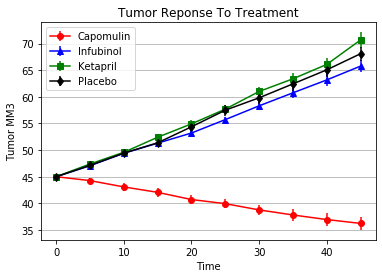

In [9]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_mean_response_df_pivot.index,tumor_mean_response_df_pivot["Capomulin"],yerr=tumor_stderror_response_df_pivot["Capomulin"],color='r',marker='o')
plt.errorbar(tumor_mean_response_df_pivot.index,tumor_mean_response_df_pivot["Infubinol"],yerr=tumor_stderror_response_df_pivot["Infubinol"],color='b',marker='^')
plt.errorbar(tumor_mean_response_df_pivot.index,tumor_mean_response_df_pivot["Ketapril"],yerr=tumor_stderror_response_df_pivot["Ketapril"],color='g',marker='s')
plt.errorbar(tumor_mean_response_df_pivot.index,tumor_mean_response_df_pivot["Placebo"],yerr=tumor_stderror_response_df_pivot["Placebo"],color='k', marker='d')


plt.grid(axis='y')
plt.legend(["Capomulin","Infubinol","Ketapril","Placebo"])
plt.title("Tumor Reponse To Treatment")
plt.xlabel("Time")
plt.ylabel("Tumor MM3")
# Save the Figure
plt.show()



In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_mean_response = combined_dataframe.groupby(["Drug", "Timepoint"]).mean()['Metastatic Sites']

# Convert to DataFrame
meta_mean_response_df = pd.DataFrame(meta_mean_response)

# Preview DataFrame
meta_mean_response_df = meta_mean_response_df.reset_index()
meta_mean_response_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [15]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_stderror_response = combined_dataframe.groupby(["Drug", "Timepoint"]).sem()['Metastatic Sites']

# Convert to DataFrame
meta_stderror_response_df = pd.DataFrame(meta_stderror_response)

# Preview DataFrame
meta_stderror_response_df = meta_stderror_response_df.reset_index()
meta_stderror_response_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [20]:
# Minor Data Munging to Re-Format the Data Frames
meta_mean_response_df_pivot = meta_mean_response_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
meta_mean_response_df_pivot

meta_stderror_response_df_pivot = meta_stderror_response_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
meta_mean_response_df_pivot
# Preview that Reformatting worked
meta_stderror_response_df_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [12]:
tumor_mean_response_df_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


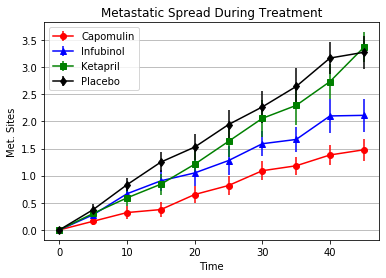

In [21]:
# Generate the Plot (with Error Bars)
plt.errorbar(meta_mean_response_df_pivot.index,meta_mean_response_df_pivot["Capomulin"],yerr=meta_stderror_response_df_pivot["Capomulin"],color='r',marker='o')
plt.errorbar(meta_mean_response_df_pivot.index,meta_mean_response_df_pivot["Infubinol"],yerr=meta_stderror_response_df_pivot["Infubinol"],color='b',marker='^')
plt.errorbar(meta_mean_response_df_pivot.index,meta_mean_response_df_pivot["Ketapril"],yerr=meta_stderror_response_df_pivot["Ketapril"],color='g',marker='s')
plt.errorbar(meta_mean_response_df_pivot.index,meta_mean_response_df_pivot["Placebo"],yerr=meta_stderror_response_df_pivot["Placebo"],color='k', marker='d')


plt.grid(axis='y')
plt.legend(["Capomulin","Infubinol","Ketapril","Placebo"])
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time")
plt.ylabel("Met. Sites")
# Save the Figure

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [24]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count_survrates = combined_dataframe.groupby(["Drug", "Timepoint"]).count()['Mouse ID']

# Convert to DataFrame
mice_count_survrates_df = pd.DataFrame(mice_count_survrates)

# Preview DataFrame
mice_count_survrates_df = mice_count_survrates_df.reset_index()
mice_count_survrates_df.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [32]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_survrates_df_pivot = mice_count_survrates_df.pivot(index="Timepoint", columns="Drug")["Mouse ID"]
mice_count_survrates_df_pivot

mice_percentage_survrates_df_pivot = (mice_count_survrates_df.pivot(index="Timepoint", columns="Drug")["Mouse ID"])/25*100
mice_percentage_survrates_df_pivot

# Preview the Data Frame
mice_count_survrates_df_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


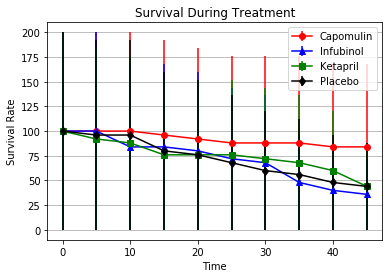

In [33]:
# Generate the Plot (Accounting for percentages)
plt.errorbar(mice_percentage_survrates_df_pivot.index,mice_percentage_survrates_df_pivot["Capomulin"],yerr=mice_percentage_survrates_df_pivot["Capomulin"],color='r',marker='o')
plt.errorbar(mice_percentage_survrates_df_pivot.index,mice_percentage_survrates_df_pivot["Infubinol"],yerr=mice_percentage_survrates_df_pivot["Infubinol"],color='b',marker='^')
plt.errorbar(mice_percentage_survrates_df_pivot.index,mice_percentage_survrates_df_pivot["Ketapril"],yerr=mice_percentage_survrates_df_pivot["Ketapril"],color='g',marker='s')
plt.errorbar(mice_percentage_survrates_df_pivot.index,mice_percentage_survrates_df_pivot["Placebo"],yerr=mice_percentage_survrates_df_pivot["Placebo"],color='k', marker='d')


plt.grid(axis='y')
plt.legend(["Capomulin","Infubinol","Ketapril","Placebo"])
plt.title("Survival During Treatment")
plt.xlabel("Time")
plt.ylabel("Survival Rate")

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)